In [56]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold, StratifiedKFold, LeavePOut, cross_val_score, LeaveOneOut

from sklearn.neighbors import KNeighborsClassifier

In [57]:
df = pd.read_csv(r"C:\Users\USER\Documents\fruit_classification_dataset.csv")
df

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana
...,...,...,...,...,...,...,...
9995,3.7,round,49.7,72.7,purple,tangy,plum
9996,2.8,oval,18.1,65.5,red,sweet,strawberry
9997,8.7,oval,177.7,72.2,green,sweet,pear
9998,18.0,round,1165.0,107.0,brown,sweet,coconut


## EDA

In [58]:
df.head()

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana


In [59]:
df.tail()

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
9995,3.7,round,49.7,72.7,purple,tangy,plum
9996,2.8,oval,18.1,65.5,red,sweet,strawberry
9997,8.7,oval,177.7,72.2,green,sweet,pear
9998,18.0,round,1165.0,107.0,brown,sweet,coconut
9999,7.2,round,252.1,111.3,red,sweet,pomegranate


In [62]:
df['fruit_name'].values

array(['watermelon', 'watermelon', 'custard apple', ..., 'pear',
       'coconut', 'pomegranate'], dtype=object)

In [63]:
df['shape'].values

array(['round', 'round', 'round', ..., 'oval', 'round', 'round'],
      dtype=object)

In [64]:
df.isnull().sum()

size (cm)        0
shape            0
weight (g)       0
avg_price (₹)    0
color            0
taste            0
fruit_name       0
dtype: int64

In [65]:
df.duplicated().sum()

np.int64(246)

## Label Encoder

In [66]:
for data in df.columns.to_list():
    if df[data].dtype == "object":
       df[data] = LabelEncoder().fit_transform(df[data])

In [67]:
df

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,2,3089.2,137.1,2,1,19
1,24.6,2,3283.9,163.8,2,1,19
2,7.8,2,319.0,91.3,2,1,5
3,20.0,1,1607.0,85.7,3,1,13
4,10.2,0,131.5,37.8,7,1,1
...,...,...,...,...,...,...,...
9995,3.7,2,49.7,72.7,5,2,16
9996,2.8,1,18.1,65.5,6,1,18
9997,8.7,1,177.7,72.2,2,1,14
9998,18.0,2,1165.0,107.0,1,1,4


In [68]:
X = ('size (cm)', 'shape', 'weight (g)	', 'avg_price (₹)', 'color', 'taste')
y = ('fruit_name')

In [69]:
X

('size (cm)', 'shape', 'weight (g)\t', 'avg_price (₹)', 'color', 'taste')

In [70]:
y

'fruit_name'

<Axes: >

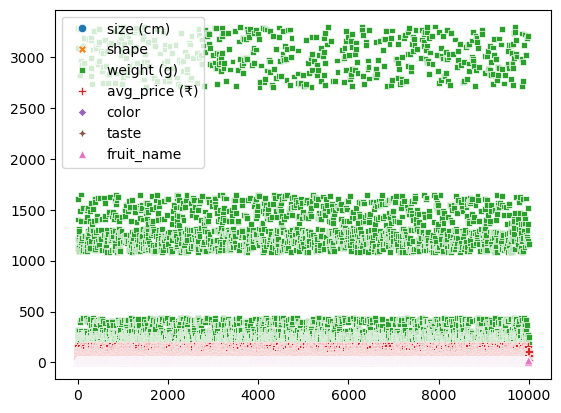

In [71]:
sns.scatterplot(df)

In [75]:
import matplotlib.pyplot as plt

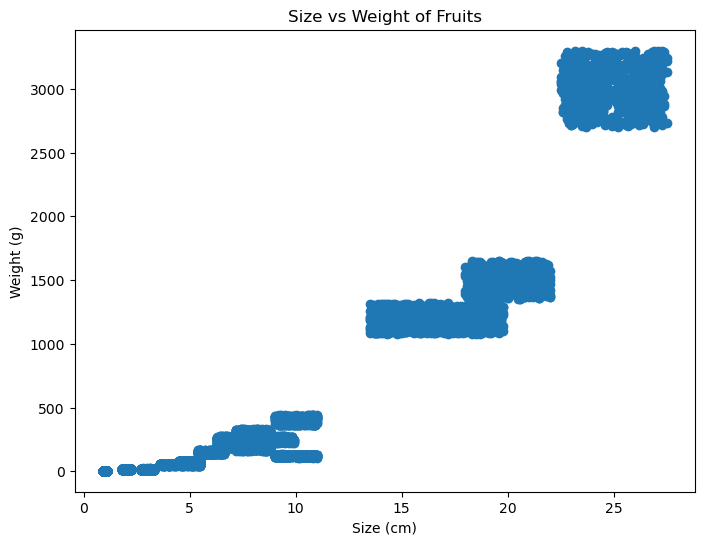

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(df['size (cm)'], df['weight (g)'])
plt.xlabel('Size (cm)')
plt.ylabel('Weight (g)')
plt.title('Size vs Weight of Fruits')
plt.show()

In [80]:
numerical_cols = ['size (cm)', 'weight (g)', 'avg_price (₹)']

In [81]:
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)

               size (cm)  weight (g)  avg_price (₹)
size (cm)       1.000000    0.918319       0.602929
weight (g)      0.918319    1.000000       0.550370
avg_price (₹)   0.602929    0.550370       1.000000


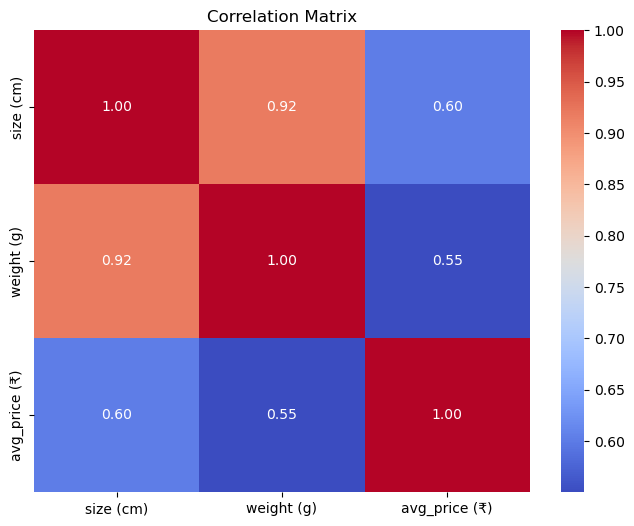

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [83]:
from sklearn.metrics import f1_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [85]:
X = df[['size (cm)', 'shape', 'weight (g)', 'avg_price (₹)', 'color', 'taste']]
y = df['fruit_name']

In [86]:
# train, test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [87]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [89]:
## Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [90]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00       116
           3       1.00      1.00      1.00        89
           4       0.98      1.00      0.99       111
           5       1.00      1.00      1.00        99
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00       115
           8       1.00      1.00      1.00        84
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00       107
          11       1.00      1.00      1.00        87
          12       1.00      1.00      1.00        89
          13       0.99      0.98      0.98        96
          14       1.00      1.00      1.00       106
          15       1.00      0.99      0.99        93
          16       1.00      1.00      1.00

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [92]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

In [93]:
# Evaluation
print("Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Naive Bayes Classifier:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00       116
           3       1.00      1.00      1.00        89
           4       1.00      1.00      1.00       111
           5       1.00      1.00      1.00        99
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00       115
           8       1.00      1.00      1.00        84
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00       107
          11       1.00      1.00      1.00        87
          12       1.00      1.00      1.00        89
          13       1.00      1.00      1.00        96
          14       1.00      1.00      1.00       106
          15       1.00      1.00      1.00        93
          16       1.00      1.00      1

In [94]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [95]:
y_pred = dt_model.predict(X_test)

In [98]:
print(f"Accuracy score for Decision Tree Model: {round(accuracy_score(y_test, y_pred), 2)}%")

Accuracy score for Decision Tree Model: 1.0%


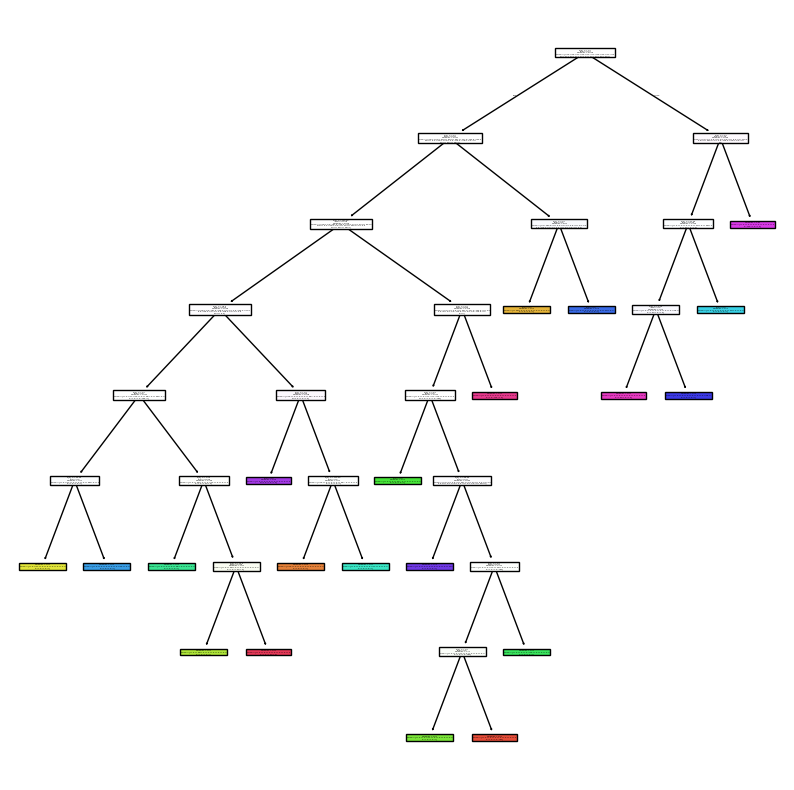

In [99]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dt_model.fit(X_train, y_train),filled=True)
plt.show()

In [110]:
model = {"KNN":98.10, "SVM":71.25, "Random Forest":96.24, "Decision Tree":100.00, "Logistics Regression":99.85, "Naive Bayes":100.00}

In [111]:
model_df = pd.DataFrame({"Model": model.keys(), "Scores": model.values()})
model_df

,Model,Scores
0,KNN,98.10
1,SVM,71.25
2,Random Forest,96.24
3,Decision Tree,100.00
4,Logistics Regression,99.85
5,Naive Bayes,100.00
